https://arxiv.org/pdf/2211.10295.pdf

# 1 Initialize

In [1]:
visible_devices = [1]
import datetime
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if len(visible_devices) == 0:
        visible_devices = int(visible_devices) # type: ignore
    elif len(visible_devices) == 1:
        if len(visible_devices[0]) == 0: # type: ignore
            visible_devices = int(visible_devices[0])
        else:
            visible_devices = [int(i) for i in visible_devices[0]] # type: ignore
    else:
        visible_devices = [int(i) for i in visible_devices]
print("Visible devices:", visible_devices)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
gpu_models = get_gpu_info()
if gpu_models:
    training_device = gpu_models[eval(os.environ["CUDA_VISIBLE_DEVICES"])]
    print("Successfully loaded GPU model: {}".format(training_device))
else:
    training_device = 'undetermined'
    print("Failed to load GPU model. Defaulting to 'undetermined'.")
    
results_dir = "../results/"
null_hypotheses_dir = "../results/null_hypotheses/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
if not os.path.exists(null_hypotheses_dir):
    print("WARNING: Null hypotheses directory does not exist")
    
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-01-10 13:34:23.631419: Importing os...
2024-01-10 13:34:23.631581: Importing sys...
Visible devices: [1]
2024-01-10 13:34:23.631992: Importing timer from timeit...
2024-01-10 13:34:23.632091: Setting env variables for tf import (only device [1] will be available)...
2024-01-10 13:34:23.632290: Importing numpy...
2024-01-10 13:34:23.749614: Importing matplotlib...
2024-01-10 13:34:24.208169: Importing h5py...
2024-01-10 13:34:24.232176: Importing importlib.util...
2024-01-10 13:34:24.232287: Importing json...
2024-01-10 13:34:24.232358: Importing pandas...
2024-01-10 13:34:24.552918: Importing random...
2024-01-10 13:34:24.553103: Importing scipy utils...
2024-01-10 13:34:24.887333: Importing subprocess...
2024-01-10 13:34:24.887500: Importing tensorflow...
Tensorflow version: 2.12.0
2024-01-10 13:34:27.134279: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-01-10 13:34:27.415152: Importing timeit...
2024-01-10 13:34:27.415271: Importing tqdm...
2024

In [2]:
#seed = 0
#ndims = 5
#epsilon = 0.005
#GMetrics.utils.reset_random_seeds(seed)
#loc1 = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
#scale1 = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
#loc2 = np.array(np.random.uniform(-epsilon,epsilon,ndims),dtype=np.float64)
#scale2 = np.array(np.random.uniform(1-epsilon,1+epsilon,ndims),dtype=np.float64)
#dist_1 = tfd.Independent(tfp.distributions.Normal(loc=loc1, scale=scale1), reinterpreted_batch_ndims=1)
#dist_2 = tfd.Independent(tfp.distributions.Normal(loc=loc2, scale=scale2), reinterpreted_batch_ndims=1)
#print(dist_1.dtype, dist_2.dtype)
#print('Types of distributions: ', type(dist_1), type(dist_2))
#print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
#print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
#print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

# Null hypotheses

In [2]:
seed = 0
ncomp = 3
ndims = 100
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


In [7]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,#_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
nsamples 100000
batch_size 10000
niter 10
niter * batch_size 100000
small_sample True


In [8]:
TwoSampleTestInputs.dist_1_num

<tf.Tensor: shape=(100000, 100), dtype=float64, numpy=
array([[ 6.28576365,  2.59459899,  7.34783214, ...,  2.92631637,
         0.399349  ,  4.81829229],
       [ 6.36696588,  2.65398562,  7.42438439, ...,  2.47989494,
         0.36743727,  4.69489367],
       [ 5.64320903,  7.11450923,  5.56163447, ...,  0.19266382,
         8.59561164,  0.79421893],
       ...,
       [ 5.40992661,  7.21369621,  6.64005359, ...,  0.19844463,
         8.92349265,  1.71311341],
       [ 3.15904309,  5.99744805,  4.43664889, ...,  8.88589547,
        10.0896234 ,  9.58520398],
       [ 6.63707914,  2.63439796,  7.44652629, ...,  2.53551605,
         0.37203585,  4.52912953]])>

In [9]:
TwoSampleTestInputs.dist_2_num

<tf.Tensor: shape=(100000, 100), dtype=float64, numpy=
array([[ 7.04447855,  2.86086399,  7.49807629, ...,  2.74425165,
         0.67866113,  4.30558457],
       [ 7.25682393,  2.51601738,  7.28539061, ...,  2.98717153,
         0.58323376,  4.28893931],
       [ 3.15917718,  6.62879436,  3.54881   , ...,  8.21873393,
         9.61085241,  9.75455771],
       ...,
       [ 3.17680907,  7.46416258,  3.5612062 , ...,  9.22642887,
        10.19638039, 10.11749861],
       [ 3.07055749,  7.39810741,  3.97278667, ...,  8.90037893,
         9.6402944 ,  9.56275706],
       [ 7.21251155,  2.74676933,  7.27690228, ...,  2.54620075,
         0.72728612,  4.83050422]])>

In [10]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
                                   progress_bar = True,
                                   verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [8]:
#d1 = np.array(TwoSampleTestInputs.dist_1_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
#d2 = np.array(TwoSampleTestInputs.dist_2_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
#print("------------------------------------------")
#print("Starting FPD metric calculation...")
#print("Running Jetnet FPD calculation...")
#print("niter = 10")
#print("batch_size = 10000")
#start = timer()
#FPDResult = [JMetrics.fpd(s1,s2)[0] for s1,s2 in zip(d1,d2)]
#end = timer()
#print(f"FPD metric calculation completed in {end-start} seconds.")

## FN Test

In [9]:
FNMetric.Test_tf(max_vectorize = 200)
FNMetric.Results[-1].result_value


------------------------------------------
Starting FN metric calculation...
Running TF FN calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 50
Iterating from 0 to 200 out of 10000 .


Iterating from 200 to 400 out of 10000 .
Iterating from 400 to 600 out of 10000 .
Iterating from 600 to 800 out of 10000 .
Iterating from 800 to 1000 out of 10000 .
Iterating from 1000 to 1200 out of 10000 .
Iterating from 1200 to 1400 out of 10000 .
Iterating from 1400 to 1600 out of 10000 .
Iterating from 1600 to 1800 out of 10000 .
Iterating from 1800 to 2000 out of 10000 .
Iterating from 2000 to 2200 out of 10000 .
Iterating from 2200 to 2400 out of 10000 .
Iterating from 2400 to 2600 out of 10000 .
Iterating from 2600 to 2800 out of 10000 .
Iterating from 2800 to 3000 out of 10000 .
Iterating from 3000 to 3200 out of 10000 .
Iterating from 3200 to 3400 out of 10000 .
Iterating from 3400 to 3600 out of 10000 .
Iterating from 3600 to 3800 out of 10000 .
Iterating from 3800 to 4000 out of 10000 .
Iterating from 4000 to 4200 out of 10000 .
Iterating from 4200 to 4400 out of 10000 .
Iterating from 4400 to 4600 out of 10000 .
Iterating from 4600 to 4800 out of 10000 .
Iterating from 480

{'metric_list': array([0.63153781, 0.91200198, 0.53813146, ..., 0.76297936, 0.61496052,
        0.63752905])}

In [10]:
FNMetric.Results.save_to_json(null_hypotheses_dir+"Null_100D_FN.json")

In [7]:
FNMetric.Results.load_from_json(null_hypotheses_dir+"Null_100D_FN.json")

mu = 0.5806448578627241 +/- 0.00037602986181566733
sigma = 0.1939148941715585 +/- 0.002072431624560086


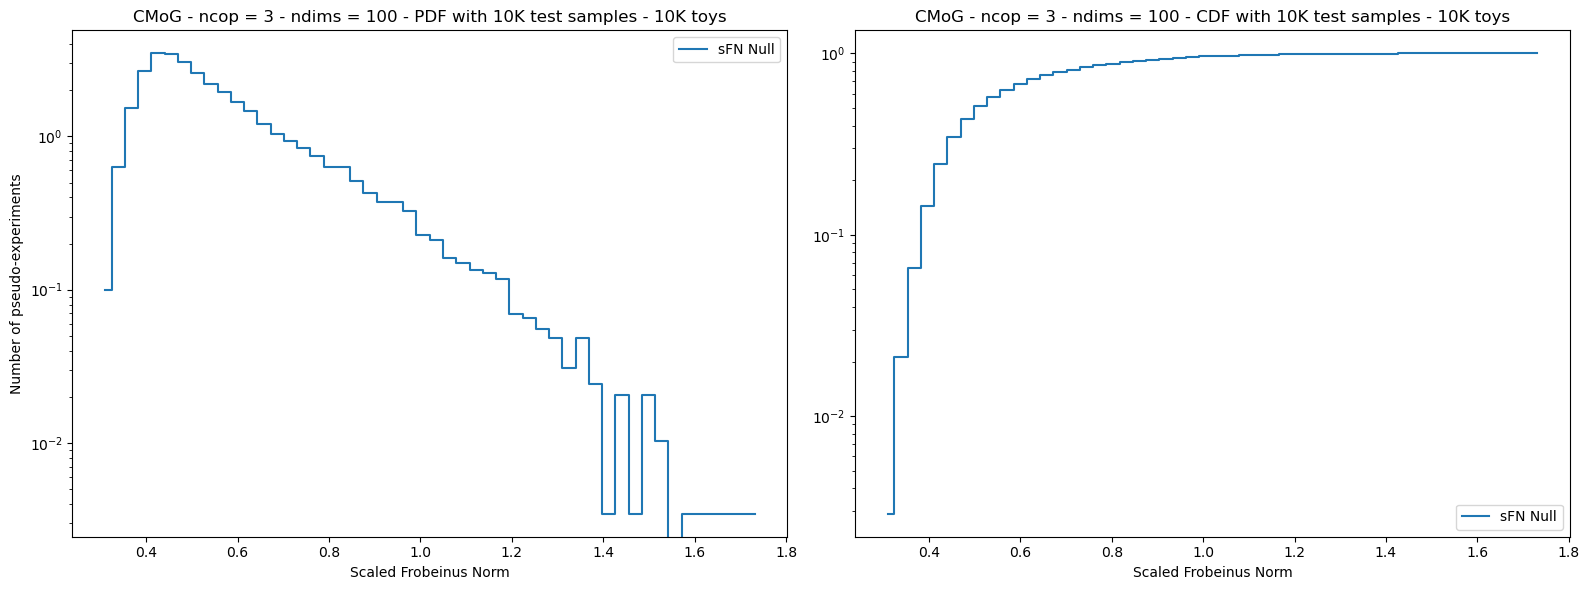

Time elapsed: 0.8687793537974358 seconds.


In [8]:
start = timer()

nsamples = FNMetric.Inputs.batch_size_test
niter = FNMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(FNMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)/ndims
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='sFN Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005, 0.2)
#ax[0].set_ylim(0.01, 40)
ax[0].set_xlabel('Scaled Frobeinus Norm')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='sFN Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005, 0.2)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Scaled Frobeinus Norm')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [9]:
cl_list = [0.68, 0.95, 0.99]
fn_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
fn_thresholds

[[0.68, [6800, 3199], 0.6149173444211278],
 [0.95, [9500, 500], 0.9748590486960077],
 [0.99, [9900, 100], 1.229249515255823]]

## KS Test

In [9]:
KSTest.Test_tf(max_vectorize=10000)
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 100
Iterating from 0 to 100 out of 10000 .
Iterating from 100 to 200 out of 10000 .
Iterating from 200 to 300 out of 10000 .
Iterating from 300 to 400 out of 10000 .
Iterating from 400 to 500 out of 10000 .
Iterating from 500 to 600 out of 10000 .
Iterating from 600 to 700 out of 10000 .
Iterating from 700 to 800 out of 10000 .
Iterating from 800 to 900 out of 10000 .
Iterating from 900 to 1000 out of 10000 .
Iterating from 1000 to 1100 out of 10000 .
Iterating from 1100 to 1200 out of 10000 .
Iterating from 1200 to 1300 out of 10000 .
Iterating from 1300 to 1400 out of 10000 .
Iterating from 1400 to 1500 out of 10000 .
Iterating from 1500 to 1600 out of 10000 .
Iteratin

{'statistic_lists': array([[0.01180002, 0.01169997, 0.0099    , ..., 0.01120001, 0.0147    ,
         0.01530001],
        [0.0148    , 0.00950003, 0.01340002, ..., 0.01409999, 0.01129997,
         0.01099998],
        [0.01050001, 0.0108    , 0.01550001, ..., 0.01319999, 0.01279998,
         0.008     ],
        ...,
        [0.0099    , 0.00890005, 0.01000002, ..., 0.00960004, 0.01189998,
         0.01300001],
        [0.00760001, 0.01139998, 0.01440001, ..., 0.0107    , 0.00989997,
         0.01319999],
        [0.01560003, 0.009     , 0.01390004, ..., 0.0113    , 0.00889999,
         0.00850004]]),
 'statistic_means': array([0.011896  , 0.012238  , 0.01238901, ..., 0.011545  , 0.010278  ,
        0.01094701]),
 'statistic_stds': array([0.00301781, 0.00287951, 0.00323561, ..., 0.00284026, 0.00212347,
        0.0028985 ]),
 'pvalue_lists': array([[0.48933744, 0.5004096 , 0.71117538, ..., 0.55727684, 0.23009062,
         0.19231009],
        [0.22343087, 0.75759482, 0.33053458, ..., 0

In [10]:
KSTest.Results.save_to_json(null_hypotheses_dir+"Null_100D_KS.json")

In [10]:
KSTest.Results.load_from_json(null_hypotheses_dir+"Null_100D_KS.json")

mu = 0.8660463367249831 +/- 0.0002448239928942651
sigma = 0.15646852491612015 +/- 0.001694439670378942


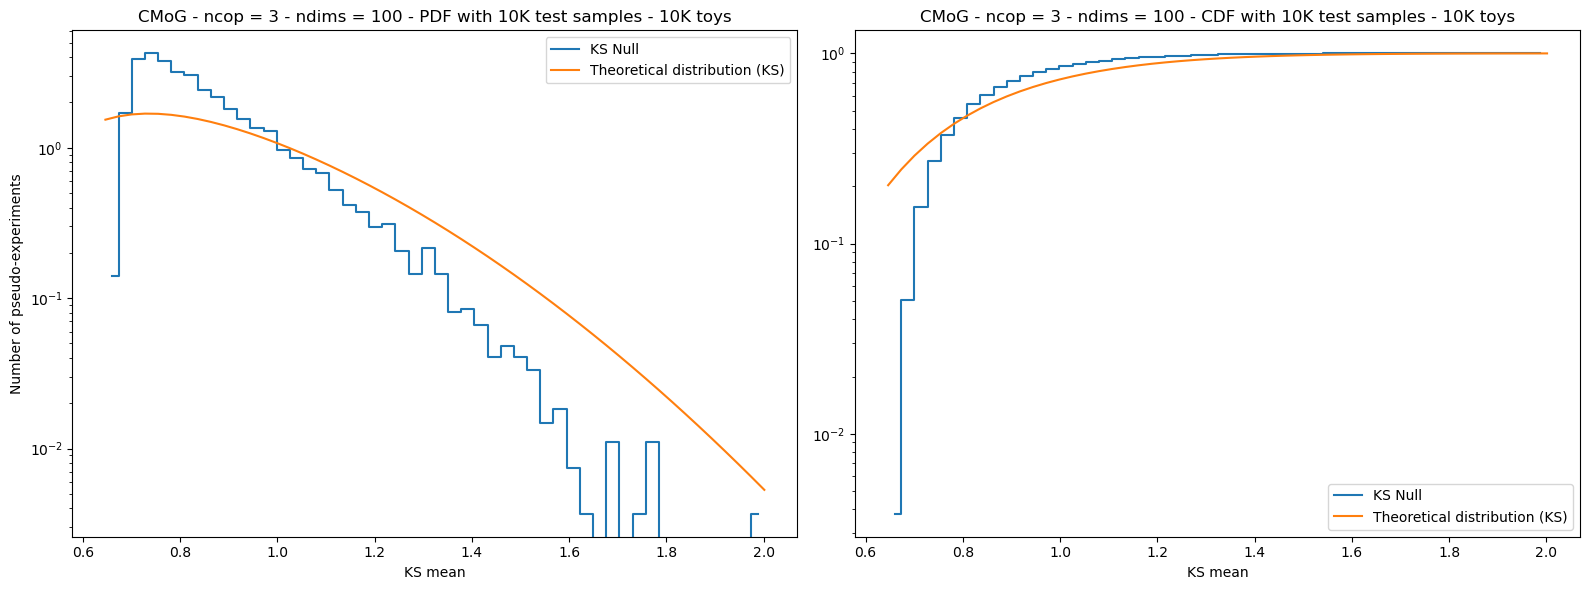

Time elapsed: 1.4682956840842962 seconds.


In [11]:
start = timer()

nsamples = KSTest.Inputs.batch_size_test
niter = KSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#shape_fit, loc_fit, scale_fit = lognorm.fit(bin_centers, floc=0)
#empirical_pdf_norm = lognorm.pdf(x, shape_fit, loc_fit, scale_fit)
#empirical_cdf_norm = lognorm.cdf(x, shape_fit, loc_fit, scale_fit)
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('KS mean')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('KS mean')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [12]:
cl_list = [0.68, 0.95, 0.99]
ks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
ks_thresholds

[[0.68, [6800, 3199], 0.8983087911976027],
 [0.95, [9500, 500], 1.182848498058637],
 [0.99, [9900, 100], 1.3836670965425062]]

## MultiKS Test

In [12]:
GMetrics.multiks_metrics.multiks_2samp_np(TwoSampleTestInputs.dist_1_num[:10000], TwoSampleTestInputs.dist_2_num[:10000])

0.0001

In [13]:
GMetrics.multiks_metrics.multiks_2samp_tf(TwoSampleTestInputs.dist_1_num[:10000], TwoSampleTestInputs.dist_2_num[:10000])

<tf.Tensor: shape=(), dtype=float32, numpy=0.0070710676>

In [15]:
MultiKSTest.Test_np()
MultiKSTest.Results[-1].result_value


------------------------------------------
Starting MultiKS tests calculation...
niter = 10
batch_size = 10000


Iterations:   0%|          | 0/10 [00:13<?, ?it/s]

Running numpy MultiKS tests...



Iterations: 100%|██████████| 10/10 [11:41<00:00, 70.11s/it]

Two-sample test calculation completed in 701.1040832102299 seconds.


{'metric_list': array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
        0.0001, 0.0001])}

In [16]:
MultiKSTest.Test_tf()
MultiKSTest.Results[-1].result_value


------------------------------------------
Starting MultiKS tests calculation...
Running TF MultiKS tests...
niter = 10
batch_size = 10000
MultiKS tests calculation completed in 5.818066664040089 seconds.


{'metric_list': array([9.99999975e-05, 9.99999975e-05, 9.99999975e-05, 9.99999975e-05,
        9.99999975e-05, 9.99999975e-05, 9.99999975e-05, 9.99999975e-05,
        9.99999975e-05, 9.99999975e-05])}

In [14]:
MultiKSTest.Results.save_to_json(null_hypotheses_dir+"Null_100D_MultiKS.json")

In [13]:
MultiKSTest.Results.load_from_json(null_hypotheses_dir+"Null_100D_MultiKS.json")

/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics/notebooks/../GMetrics/utils.py:293: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  mu_2 = moment(data, moment=2)  # second central moment (variance)
/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics/notebooks/../GMetrics/utils.py:299: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  mu_2 = moment(data, moment=2)  # second central moment (variance)
/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics/notebooks/../GMetrics/utils.py:300: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the dat

mu = 0.0070710676332352805 +/- 6.770847460736376e-38
sigma = 2.6020852139652106e-18 +/- 0.0


/tmp/ipykernel_34017/831228845.py:37: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[0].set_yscale(scale)
/tmp/ipykernel_34017/831228845.py:48: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[1].set_yscale(scale)


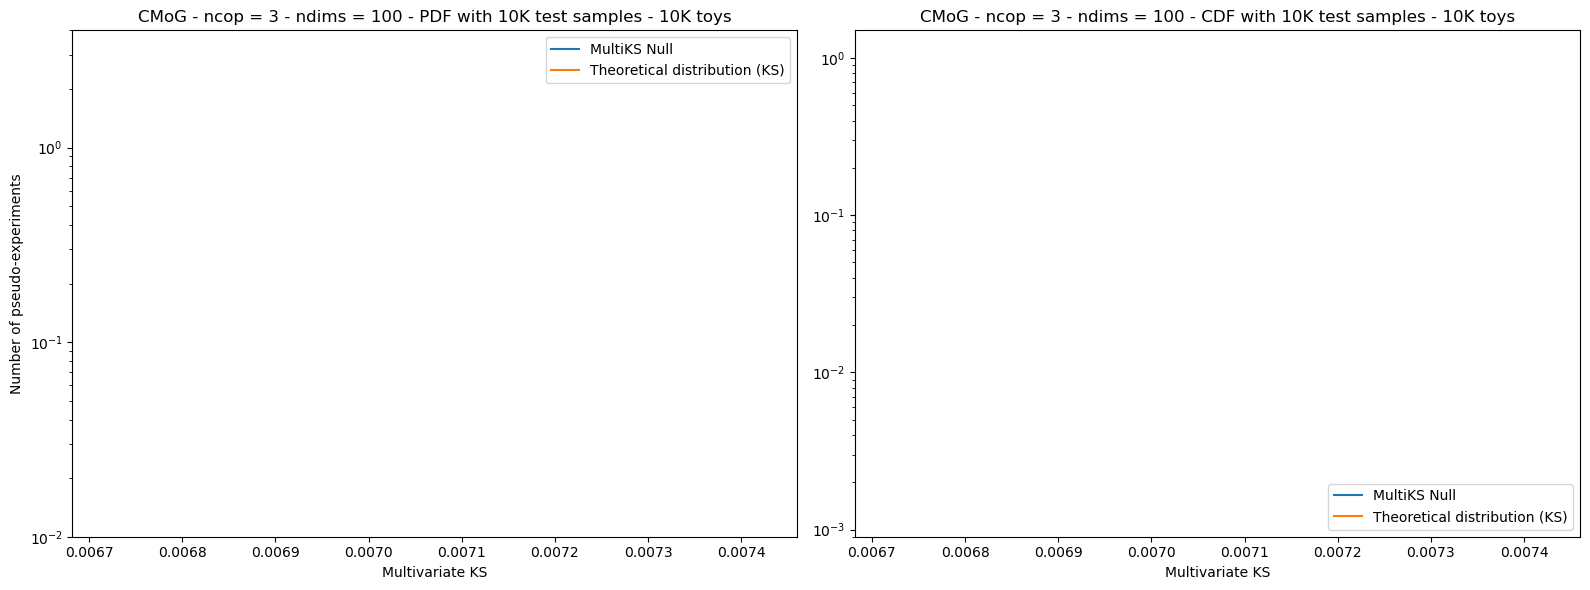

Time elapsed: 1.2823810577392578 seconds.


In [14]:
start = timer()

nsamples = MultiKSTest.Inputs.batch_size_test
niter = MultiKSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(MultiKSTest.Results[-1].result_value["metric_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='MultiKS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.04*np.sqrt(ns))
ax[0].set_ylim(0.01, 4)
ax[0].set_xlabel('Multivariate KS')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='MultiKS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.04*np.sqrt(ns))
ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Multivariate KS')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [15]:
cl_list = [0.68, 0.95, 0.99]
multi_ks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
multi_ks_thresholds

[[0.68, [6800, 3199], 0.007071067633235278],
 [0.95, [9500, 500], 0.007071067633235278],
 [0.99, [9900, 100], 0.007071067633235278]]

## SKS Test

In [17]:
#tf.config.run_functions_eagerly(True)#
SKSTest.Test_tf(max_vectorize=100)
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
Running TF SKS calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 100
Iterating from 0 to 100 out of 10000 .


Iterating from 100 to 200 out of 10000 .
Iterating from 200 to 300 out of 10000 .
Iterating from 300 to 400 out of 10000 .
Iterating from 400 to 500 out of 10000 .
Iterating from 500 to 600 out of 10000 .
Iterating from 600 to 700 out of 10000 .
Iterating from 700 to 800 out of 10000 .
Iterating from 800 to 900 out of 10000 .
Iterating from 900 to 1000 out of 10000 .
Iterating from 1000 to 1100 out of 10000 .
Iterating from 1100 to 1200 out of 10000 .
Iterating from 1200 to 1300 out of 10000 .
Iterating from 1300 to 1400 out of 10000 .
Iterating from 1400 to 1500 out of 10000 .
Iterating from 1500 to 1600 out of 10000 .
Iterating from 1600 to 1700 out of 10000 .
Iterating from 1700 to 1800 out of 10000 .
Iterating from 1800 to 1900 out of 10000 .
Iterating from 1900 to 2000 out of 10000 .
Iterating from 2000 to 2100 out of 10000 .
Iterating from 2100 to 2200 out of 10000 .
Iterating from 2200 to 2300 out of 10000 .
Iterating from 2300 to 2400 out of 10000 .
Iterating from 2400 to 2500 

{'metric_lists': array([[0.01339999, 0.01130003, 0.00699997, ..., 0.0095    , 0.0113    ,
         0.0174    ],
        [0.0094    , 0.01130003, 0.00890005, ..., 0.01050001, 0.01550001,
         0.01370001],
        [0.0113    , 0.0097    , 0.01570001, ..., 0.0151    , 0.01370001,
         0.01190001],
        ...,
        [0.01030001, 0.0087    , 0.0097    , ..., 0.0114    , 0.0151    ,
         0.01820001],
        [0.00990003, 0.01069999, 0.00800002, ..., 0.0125    , 0.01810002,
         0.01029998],
        [0.014     , 0.0187    , 0.01160002, ..., 0.0086    , 0.00730002,
         0.01279998]]),
 'metric_means': array([0.011874  , 0.011486  , 0.01248801, ..., 0.01184301, 0.01046101,
        0.011126  ]),
 'metric_stds': array([0.00299081, 0.00250176, 0.00287121, ..., 0.00322804, 0.0028859 ,
        0.00265608])}

In [18]:
SKSTest.Results.save_to_json(null_hypotheses_dir+"Null_100D_SKS.json")

In [16]:
SKSTest.Results.load_from_json(null_hypotheses_dir+"Null_100D_SKS.json")

mu = 0.8659011355779292 +/- 0.0002242250448924552
sigma = 0.14974145881901083 +/- 0.0015920754334418869


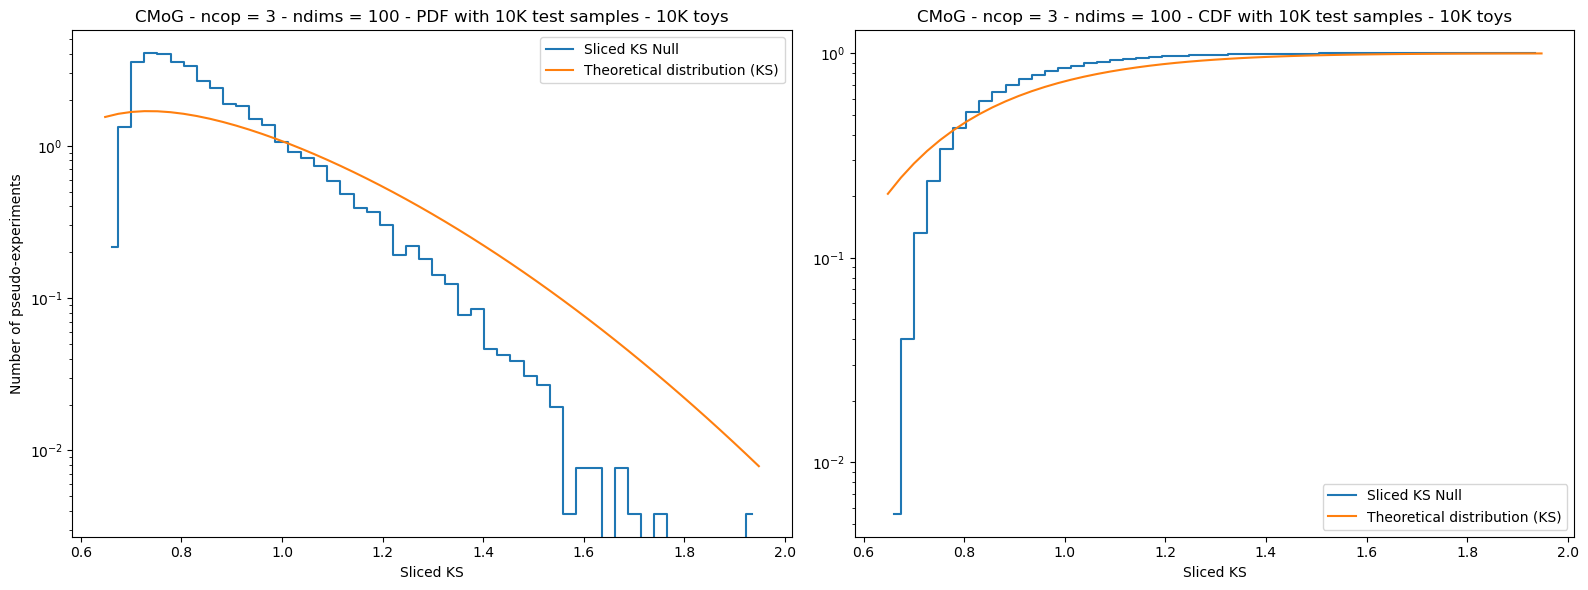

Time elapsed: 1.2369932737201452 seconds.


In [17]:
start = timer()

nsamples = SKSTest.Inputs.batch_size_test
niter = SKSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Sliced KS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 4)
ax[0].set_xlabel('Sliced KS')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Sliced KS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Sliced KS')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [18]:
cl_list = [0.68, 0.95, 0.99]
sks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
sks_thresholds

[[0.68, [6800, 3199], 0.8989453245139506],
 [0.95, [9500, 500], 1.1684943746397098],
 [0.99, [9900, 100], 1.3566555553851547]]

## SWD Test

In [9]:
SWDMetric.Test_tf(max_vectorize=200)
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
Running TF SWD calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 50
Iterating from 0 to 200 out of 10000 .


Iterating from 200 to 400 out of 10000 .
Iterating from 400 to 600 out of 10000 .
Iterating from 600 to 800 out of 10000 .
Iterating from 800 to 1000 out of 10000 .
Iterating from 1000 to 1200 out of 10000 .
Iterating from 1200 to 1400 out of 10000 .
Iterating from 1400 to 1600 out of 10000 .
Iterating from 1600 to 1800 out of 10000 .
Iterating from 1800 to 2000 out of 10000 .
Iterating from 2000 to 2200 out of 10000 .
Iterating from 2200 to 2400 out of 10000 .
Iterating from 2400 to 2600 out of 10000 .
Iterating from 2600 to 2800 out of 10000 .
Iterating from 2800 to 3000 out of 10000 .
Iterating from 3000 to 3200 out of 10000 .
Iterating from 3200 to 3400 out of 10000 .
Iterating from 3400 to 3600 out of 10000 .
Iterating from 3600 to 3800 out of 10000 .
Iterating from 3800 to 4000 out of 10000 .
Iterating from 4000 to 4200 out of 10000 .
Iterating from 4200 to 4400 out of 10000 .
Iterating from 4400 to 4600 out of 10000 .
Iterating from 4600 to 4800 out of 10000 .
Iterating from 480

{'metric_lists': array([[0.03212219, 0.02718736, 0.02835688, ..., 0.02777392, 0.02471365,
         0.04916933],
        [0.06539702, 0.03441275, 0.05730397, ..., 0.03167933, 0.02081036,
         0.07077043],
        [0.02033986, 0.01519281, 0.01969827, ..., 0.02077333, 0.02429913,
         0.02170965],
        ...,
        [0.11309029, 0.02100606, 0.10535284, ..., 0.06481717, 0.0160025 ,
         0.06773732],
        [0.06792039, 0.0182379 , 0.06282733, ..., 0.03232021, 0.02901087,
         0.05007575],
        [0.01899923, 0.02348129, 0.0142708 , ..., 0.02319529, 0.0248445 ,
         0.02189985]]),
 'metric_means': array([0.02844525, 0.04252532, 0.01838174, ..., 0.05378754, 0.03498378,
        0.0206544 ]),
 'metric_stds': array([0.01458022, 0.02477282, 0.0063423 , ..., 0.03475339, 0.01844032,
        0.00850145])}

In [10]:
SWDMetric.Results.save_to_json(null_hypotheses_dir+"Null_100D_SWD.json")

In [11]:
SWDMetric.Results.load_from_json(null_hypotheses_dir+"Null_100D_SWD.json")

mu = 0.24174161303346295 +/- 8.288604199428016e-05
sigma = 0.09104177172830072 +/- 0.0008346532153448109


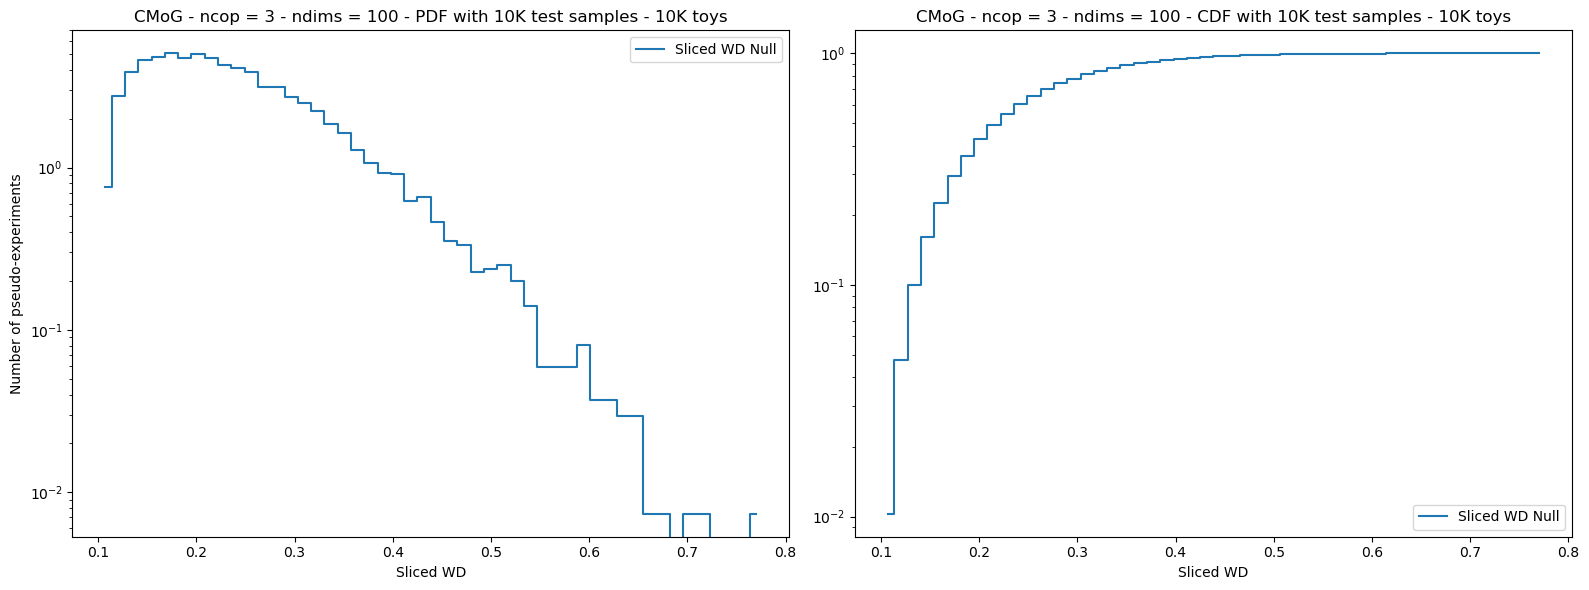

Time elapsed: 0.9109471160918474 seconds.


In [12]:
start = timer()

nsamples = SWDMetric.Inputs.batch_size_test
niter = SWDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns/ndims)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Sliced WD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.008*np.sqrt(ns), 0.055*np.sqrt(ns))
#ax[0].set_ylim(0.01, 1.8)
ax[0].set_xlabel('Sliced WD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Sliced WD Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[0].set_xlim(0.008*np.sqrt(ns), 0.055*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Sliced WD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [13]:
cl_list = [0.68, 0.95, 0.99]
swd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
swd_thresholds

[[0.68, [6800, 3199], 0.26940828122587746],
 [0.95, [9500, 500], 0.41663196393725904],
 [0.99, [9900, 100], 0.5234236379604063]]

## FPD Test (TensorFlow)

In [ ]:
FPDMetric.Test_tf(max_vectorize=80)
#FPDMetric.Test_tf(max_vectorize=100)
FPDMetric.Results[-1].result_value


------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 125
Iterating from 0 to 80 out of 10000 .


Iterating from 80 to 160 out of 10000 .
Iterating from 160 to 240 out of 10000 .
Iterating from 240 to 320 out of 10000 .
Iterating from 320 to 400 out of 10000 .
Iterating from 400 to 480 out of 10000 .
Iterating from 480 to 560 out of 10000 .
Iterating from 560 to 640 out of 10000 .
Iterating from 640 to 720 out of 10000 .
Iterating from 720 to 800 out of 10000 .
Iterating from 800 to 880 out of 10000 .
Iterating from 880 to 960 out of 10000 .
Iterating from 960 to 1040 out of 10000 .
Iterating from 1040 to 1120 out of 10000 .
Iterating from 1120 to 1200 out of 10000 .
Iterating from 1200 to 1280 out of 10000 .
Iterating from 1280 to 1360 out of 10000 .
Iterating from 1360 to 1440 out of 10000 .
Iterating from 1440 to 1520 out of 10000 .
Iterating from 1520 to 1600 out of 10000 .
Iterating from 1600 to 1680 out of 10000 .
Iterating from 1680 to 1760 out of 10000 .
Iterating from 1760 to 1840 out of 10000 .
Iterating from 1840 to 1920 out of 10000 .
Iterating from 1920 to 2000 out of 

{'metric_list': array([0.0022059 , 0.00262446, 0.00312404, ..., 0.00322589, 0.00214031,
        0.00271133]),
 'metric_error_list': array([0.00020357, 0.00029882, 0.00028478, ..., 0.00040737, 0.00017937,
        0.00026621])}

In [ ]:
FPDMetric.Results.save_to_json(null_hypotheses_dir+"Null_100D_FPD_tf.json")

In [14]:
FPDMetric.Results.load_from_json(null_hypotheses_dir+"Null_100D_FPD_tf.json")

mu = 1.234056783131788 +/- 0.0035709474432357585
sigma = 0.5975740492387331 +/- 0.008087579128609967


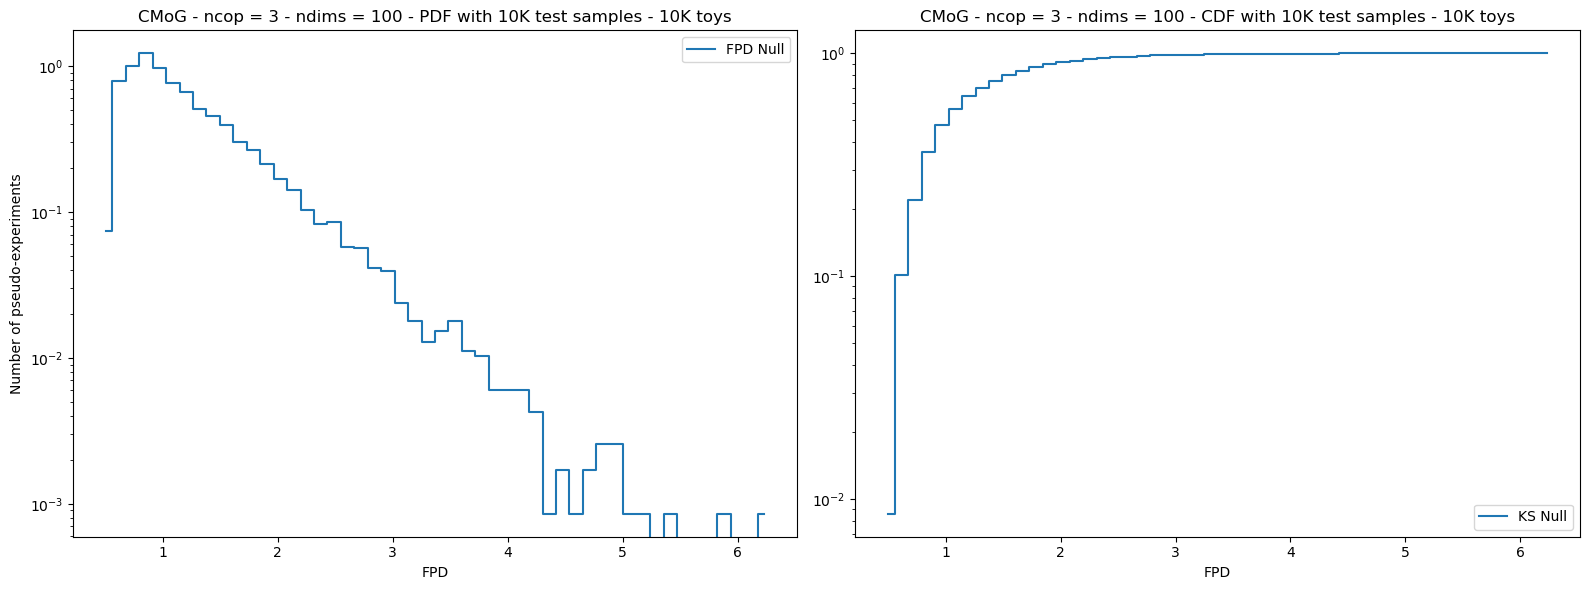

Time elapsed: 0.5530540999025106 seconds.


In [15]:
start = timer()

nsamples = FPDMetric.Inputs.batch_size_test
niter = FPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(FPDMetric.Results[-1].result_value["metric_list"])*(ns/ndims)**(3/2)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='FPD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('FPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('FPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [17]:
cl_list = [0.68, 0.95, 0.99]
fpd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
fpd_thresholds

[[0.68, [6800, 3199], 1.330717446191695],
 [0.95, [9500, 500], 2.429215025517601],
 [0.99, [9900, 100], 3.401871629391256]]

## KPD Test

In [ ]:
KPDMetric.Test_tf(max_vectorize=4)
KPDMetric.Results[-1].result_value


------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 2500
Iterating from 0 to 4 out of 10000 .
Iterating from 4 to 8 out of 10000 .
Iterating from 8 to 12 out of 10000 .
Iterating from 12 to 16 out of 10000 .
Iterating from 16 to 20 out of 10000 .
Iterating from 20 to 24 out of 10000 .
Iterating from 24 to 28 out of 10000 .
Iterating from 28 to 32 out of 10000 .
Iterating from 32 to 36 out of 10000 .
Iterating from 36 to 40 out of 10000 .
Iterating from 40 to 44 out of 10000 .
Iterating from 44 to 48 out of 10000 .
Iterating from 48 to 52 out of 10000 .
Iterating from 52 to 56 out of 10000 .
Iterating from 56 to 60 out of 10000 .
Iterating from 60 to 64 out of 10000 .
Iterating from 64 to 68 out of 10000 .
Iterati

{'metric_list': array([-1.38133389e-04, -6.03371070e-05, -8.19768747e-05, ...,
         2.64014931e-05, -9.87640947e-05,  7.27801007e-05]),
 'metric_error_list': array([9.90573839e-05, 2.08303463e-04, 1.81777284e-04, ...,
        1.96117540e-04, 2.68182118e-04, 1.25815931e-04])}

In [ ]:
KPDMetric.Results.save_to_json(null_hypotheses_dir+"Null_100D_KPD.json")

In [18]:
KPDMetric.Results.load_from_json(null_hypotheses_dir+"Null_100D_KPD.json")

mu = 0.017010195257243545 +/- 5.2964868683339965e-05
sigma = 0.07277696660574688 +/- 0.0010726763195829001


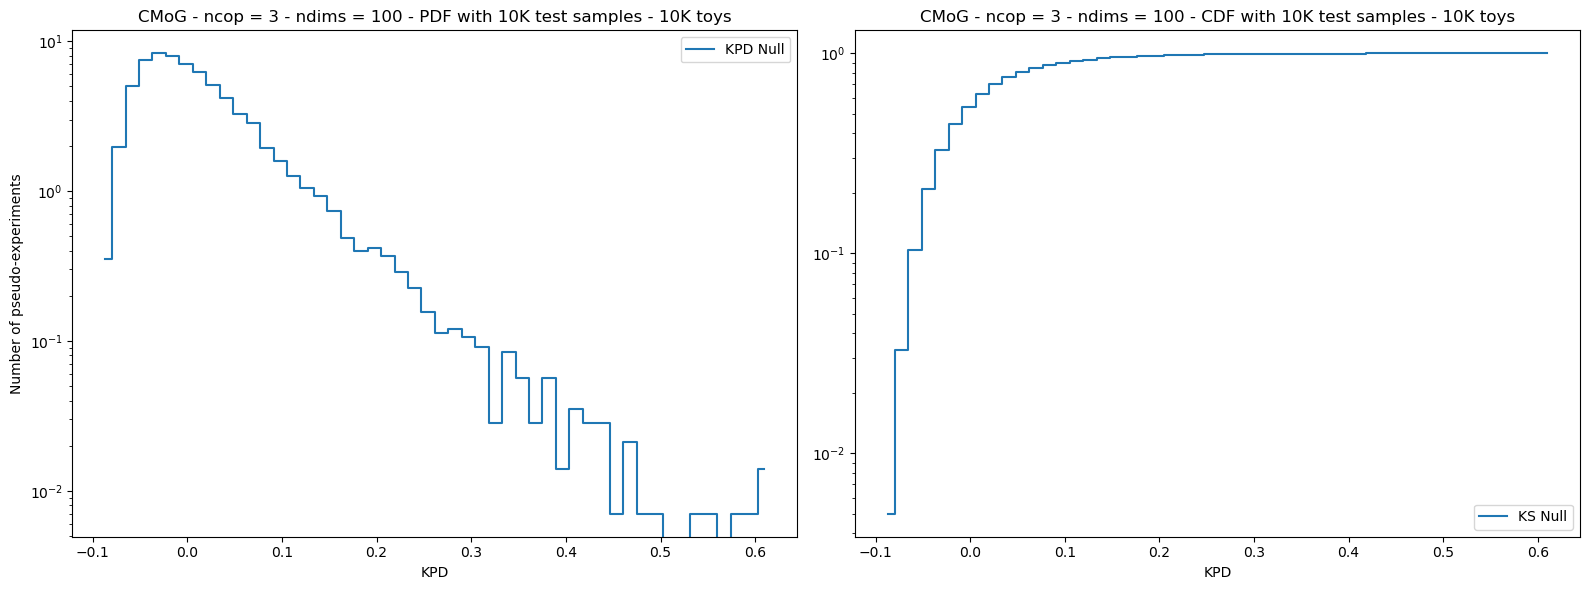

Time elapsed: 0.5769994761794806 seconds.


In [19]:
start = timer()

nsamples = KPDMetric.Inputs.batch_size_test
niter = KPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(KPDMetric.Results[-1].result_value["metric_list"])*ns/np.sqrt(ndims)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='KPD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='KPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('KPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='KPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('KPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [20]:
cl_list = [0.68, 0.95, 0.99]
kpd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
kpd_thresholds

[[0.68, [6800, 3199], 0.02934541750065911],
 [0.95, [9500, 500], 0.15536237972302303],
 [0.99, [9900, 100], 0.2835153946787461]]

# Alternative hypotheses

## Thresholds

In [2]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
print(f"multi_ks_thresholds: {multi_ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

## Scan

In [3]:
niter = 10_000
nsamples = 10_000
ns = nsamples**2 /(2*nsamples)

fn_list = []
fpd_list = []
kpd_list = []
ks_list = []
multi_ks_list = []
sks_list = []
swd_list = []
exclusion_list = []

fn_threshold_number = 0
fpd_threshold_number = 0
kpd_threshold_number = 0
ks_threshold_number = 0
multi_ks_threshold_number = 0
sks_threshold_number = 0
swd_threshold_number = 0

start = timer()  
for i in range(500):
    seed = 0
    ncomp = 3
    ndims = 20
    delta = 0.0001
    eps = 0+i*delta
    print("\n------------------")
    print(f"eps = {eps}")
    eps_loc = 10*eps
    eps_scale = eps
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
    dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)

    TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                       dist_2_input = dist_2,
                                                       niter = 10,
                                                       batch_size_test = 10_000,
                                                       batch_size_gen = 100,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = False)

    FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             verbose = False)
    FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = False,
                               verbose = False)
    KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                                 progress_bar = False,
                                 verbose = False)
    KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                             verbose = False)
    MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
                                       verbose = False)
    SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               verbose = False)
    SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                                   nslices = 100,
                                   seed_slicing = 0,
                                   verbose = False)

    if fn_threshold_number < len(fn_thresholds):
        FNMetric.Test_tf(max_vectorize = 1000)
        fn = np.mean(FNMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)
        fn_list.append(fn)
        print(f"fn statistic = {fn}")
        fn_threshold = fn_thresholds[fn_threshold_number]
        if fn > fn_threshold[1]:
            end = timer()
            print(f"=======> fn excluded at {fn_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fn statistic", fn, fn_threshold[0]])
            fn_threshold_number += 1
            
    if fpd_threshold_number < len(fpd_thresholds):
        FPDMetric.Test_tf(max_vectorize=400)
        fpd = np.mean(FPDMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)
        fpd_list.append(fpd)
        print(f"fpd statistic = {fpd}")
        fpd_threshold = fpd_thresholds[fpd_threshold_number]
        if fpd > fpd_threshold[1]:
            end = timer()
            print(f"=======> fpd excluded at {fpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fpd statistic", fpd, fpd_threshold[0]])
            fpd_threshold_number += 1
            
    if kpd_threshold_number < len(kpd_thresholds):
        KPDMetric.Test_tf(max_vectorize=2)
        kpd = np.mean(KPDMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)
        kpd_list.append(kpd)
        print(f"kpd statistic = {kpd}")
        kpd_threshold = kpd_thresholds[kpd_threshold_number]
        if kpd > kpd_threshold[1]:
            end = timer()
            print(f"=======> kpd excluded at {kpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "kpd statistic", kpd, kpd_threshold[0]])
            kpd_threshold_number += 1

    if ks_threshold_number < len(ks_thresholds):
        KSTest.Test_tf(max_vectorize=1000)
        ks = np.mean(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
        ks_list.append(ks)
        print(f"ks statistic = {ks}")
        ks_threshold = ks_thresholds[ks_threshold_number]
        if ks > ks_threshold[1]:
            end = timer()
            print(f"=======> ks excluded at {ks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "ks statistic", ks, ks_threshold[0]])
            ks_threshold_number += 1
            
    if multi_ks_threshold_number < len(multi_ks_thresholds):
        MultiKSTest.Test_tf()
        multi_ks = np.mean(MultiKSTest.Results[-1].result_value["metric_list"])*np.sqrt(ns)
        multi_ks_list.append(multi_ks)
        print(f"multi ks statistic = {multi_ks}")
        multi_ks_threshold = multi_ks_thresholds[multi_ks_threshold_number]
        if multi_ks > multi_ks_threshold[1]:
            end = timer()
            print(f"=======> multi ks excluded at {multi_ks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "multi ks statistic", multi_ks, multi_ks_threshold[0]])
            multi_ks_threshold_number += 1
            
    if sks_threshold_number < len(sks_thresholds):
        SKSTest.Test_tf(max_vectorize=1000)
        sks = np.mean(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
        sks_list.append(sks)
        print(f"sks statistic = {sks}")
        sks_threshold = sks_thresholds[sks_threshold_number]
        if sks > sks_threshold[1]:
            end = timer()
            print(f"=======> sks excluded at {sks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "sks statistic", sks, sks_threshold[0]])
            sks_threshold_number += 1
            
    if swd_threshold_number < len(swd_thresholds):
        SWDMetric.Test_tf(max_vectorize=1000)
        swd = np.mean(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns)
        swd_list.append(swd)
        print(f"swd statistic = {swd}")
        swd_threshold = swd_thresholds[swd_threshold_number]
        if swd > swd_threshold[1]:
            end = timer()
            print(f"=======> swd excluded at {swd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "swd statistic", swd, swd_threshold[0]])
            swd_threshold_number += 1
            
    if fn_threshold_number >= len(fn_thresholds) and fpd_threshold_number >= len(fpd_thresholds) and kpd_threshold_number >= len(kpd_thresholds) and ks_threshold_number >= len(ks_thresholds) and multi_ks_threshold_number >= len(multi_ks_thresholds) and sks_threshold_number >= len(sks_thresholds) and swd_threshold_number >= len(swd_thresholds):
        break
                        
end = timer()
print("Time elapsed:", end-start, "seconds.")


------------------
eps = 0.0
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 3.982985091055575
fpd statistic = 0.005039475382416134
kpd statistic = 0.0003957628994051469
ks statistic = 0.9080666848825835
multi ks statistic = 1.0104556782339025
sks statistic = 0.85002045275276
swd statistic = 1.459186855551259

------------------
eps = 0.0001
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 3.9877684827831668
fpd statistic = 0.005037485356850035
kpd statistic = 0.0003881246867572807
ks statistic = 0.9058044738621854
multi ks statistic = 1.0118697576850035
sks statistic = 0.8514700936072922
swd statistic = 1.4597670239692266

------------------
eps = 0.0002
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 3.9935467885671825
fpd statistic = 0.00503722206851

## Results

In [6]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
print(f"multi_ks_thresholds: {multi_ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

fn_thresholds: [[0.95, 6.00966873581687], [0.99, 7.646027712249452]]
fpd_thresholds: [[0.95, 0.009537109454941324], [0.99, 0.01421343518915221]]
kpd_thresholds: [[0.95, 0.009722819813022865], [0.99, 0.018193513236146715]]
ks_thresholds: [[0.95, 1.1313706138761246], [0.99, 1.2855206049622938]]
multi_ks_thresholds: [[0.95, 1.4566393387274343], [0.99, 1.668772856652466]]
sks_thresholds: [[0.95, 1.112986448315256], [0.99, 1.2742067049480295]]
swd_thresholds: [[0.95, 2.202632934055404], [0.99, 2.709669622518888]]


In [7]:
exclusion_list

[[0.001, 'ks statistic', 1.150887381160314, 0.95],
 [0.0012000000000000001, 'multi ks statistic', 1.530886280735438, 0.95],
 [0.0014, 'ks statistic', 1.3180470296371594, 0.99],
 [0.0014, 'multi ks statistic', 1.7239264333480646, 0.99],
 [0.0028, 'sks statistic', 1.1180563783334174, 0.95],
 [0.0038, 'sks statistic', 1.2864044770591279, 0.99],
 [0.0047, 'swd statistic', 2.2182914444980377, 0.95],
 [0.0056, 'fn statistic', 6.0574178843144955, 0.95],
 [0.0066, 'swd statistic', 2.7104153926616084, 0.99],
 [0.007, 'fpd statistic', 0.009609203049437362, 0.95],
 [0.0079, 'fn statistic', 7.68188235367881, 0.99],
 [0.008400000000000001, 'kpd statistic', 0.009764225877369557, 0.95],
 [0.0097, 'fpd statistic', 0.014357532653492577, 0.99],
 [0.0117, 'kpd statistic', 0.01850402001449033, 0.99]]

# Backup

In [ ]:
seed = 0
for ncomp in [3]:
    for nsamples in [1000, 10_000, 100000]:
        for ndims in [4, 8, 16, 32, 64]:
            start = timer()
            result_dict = {}
            seed = seed + 1
            result_dict['ncomp'] = ncomp
            result_dict['ndims'] = ndims
            result_dict['seed'] = seed
            result_dict['nsamples'] = nsamples
            dist = MixtureGaussian(ncomp,ndims,seed)
            niter = 10000
            ns = nsamples**2 /(2*nsamples)
            result_dict['niter'] = niter
            result_dict['ns'] = ns
            sks_means_10, sks_stds_10, sks_dists_10 = [], [], []
            sks_means_100, sks_stds_100, sks_dists_100 = [], [], []
            sks_means_300, sks_stds_300, sks_dists_300 = [], [], []
            sks_means_1000, sks_stds_1000, sks_dists_1000 = [], [], []
            data_mean_cov = []
            s = dist.sample(2*nsamples)
            s1, s2 = s[:nsamples], s[nsamples:]
            _, _, _, sliced_data1_cov_10, _ = sks_2samp_tf(s1,s2, nslices = 10, cov = True) # type: ignore
            _, _, _, sliced_data1_cov_100, _ = sks_2samp_tf(s1,s2, nslices = 100, cov = True) # type: ignore
            _, _, _, sliced_data1_cov_300, _ = sks_2samp_tf(s1,s2, nslices = 300, cov = True) # type: ignore
            _, _, _, sliced_data1_cov_1000, _ = sks_2samp_tf(s1,s2, nslices = 1000, cov = True) # type: ignore
            for i in tqdm(range(niter)):
                s = dist.sample(2*nsamples)
                s1, s2 = s[:nsamples], s[nsamples:]
                sks_mean_1000, sks_std_1000, sks_proj_1000, _, _ = sks_2samp_tf(s1,s2, nslices = 1000, cov = False) # type: ignore
                sks_proj_10 = sks_proj_1000[:10]; sks_mean_10 = tf.reduce_mean(sks_proj_10); sks_std_10 = tf.math.reduce_std(sks_proj_10)
                sks_proj_100 = sks_proj_1000[:100]; sks_mean_100 = tf.reduce_mean(sks_proj_100); sks_std_100 = tf.math.reduce_std(sks_proj_100)
                sks_proj_300 = sks_proj_1000[:300]; sks_mean_300 = tf.reduce_mean(sks_proj_300); sks_std_300 = tf.math.reduce_std(sks_proj_300)
                sks_means_10.append(sks_mean_10); sks_stds_10.append(sks_std_10); sks_dists_10.append(sks_proj_10)
                sks_means_100.append(sks_mean_100); sks_stds_100.append(sks_std_100); sks_dists_100.append(sks_proj_100)
                sks_means_300.append(sks_mean_300); sks_stds_300.append(sks_std_300); sks_dists_300.append(sks_proj_300)
                sks_means_1000.append(sks_mean_1000); sks_stds_1000.append(sks_std_1000); sks_dists_1000.append(sks_proj_1000)
            data_mean_cov = tf.sqrt(tf.reduce_mean(tfp.stats.covariance(s1, sample_axis=0, event_axis=-1))).numpy()
            sliced_data_mean_cov_10 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_10)).numpy()
            sliced_data_mean_cov_100 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_100)).numpy()
            sliced_data_mean_cov_300 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_300)).numpy()
            sliced_data_mean_cov_1000 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_1000)).numpy()
            sks_means_10 = tf.stack(sks_means_10).numpy(); sks_stds_10 = tf.stack(sks_stds_10).numpy(); sks_dists_10 = tf.stack(sks_dists_10).numpy()
            sks_means_100 = tf.stack(sks_means_100).numpy(); sks_stds_100 = tf.stack(sks_stds_100).numpy(); sks_dists_100 = tf.stack(sks_dists_100).numpy()
            sks_means_300 = tf.stack(sks_means_300).numpy(); sks_stds_300 = tf.stack(sks_stds_300).numpy(); sks_dists_300 = tf.stack(sks_dists_300).numpy()
            sks_means_1000 = tf.stack(sks_means_1000).numpy(); sks_stds_1000 = tf.stack(sks_stds_1000).numpy(); sks_dists_1000 = tf.stack(sks_dists_1000).numpy()
            result_dict['10'] = {'sliced_data_mean_cov': sliced_data_mean_cov_10, 'sks_means': sks_means_10, 'sks_stds': sks_stds_10, 'mu': tf.math.reduce_mean(sks_means_10*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_10*np.sqrt(ns)).numpy()}
            result_dict['100'] = {'sliced_data_mean_cov': sliced_data_mean_cov_100, 'sks_means': sks_means_100, 'sks_stds': sks_stds_100, 'mu': tf.math.reduce_mean(sks_means_100*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_100*np.sqrt(ns)).numpy()}
            result_dict['300'] = {'sliced_data_mean_cov': sliced_data_mean_cov_300, 'sks_means': sks_means_300, 'sks_stds': sks_stds_300, 'mu': tf.math.reduce_mean(sks_means_300*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_300*np.sqrt(ns)).numpy()}
            result_dict['1000'] = {'sliced_data_mean_cov': sliced_data_mean_cov_1000, 'sks_means': sks_means_1000, 'sks_stds': sks_stds_1000, 'mu': tf.math.reduce_mean(sks_means_1000*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_1000*np.sqrt(ns)).numpy()}
            
            dict_to_save = Utils.convert_types_dict(result_dict)
            with codecs.open(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.json', "w", encoding="utf-8") as f:
                json.dump(dict_to_save, f, separators=(",", ":"), indent=4)
    
            print("================== ncomp =", ncomp, "ndims =", ndims, "==================")
            print(f"The square root of the mean covariance of the data is {data_mean_cov}")
            print(f"The square root of the mean covariance of the sliced data (10 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_10))}")
            print(f"The square root of the mean covariance of the sliced data (100 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_100))}")
            print(f"The square root of the mean covariance of the sliced data (300 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_300))}")
            print(f"The square root of the mean covariance of the sliced data (1000 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_1000))}")
            print(f"The estimated mean and variance (10 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_10*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_10*np.sqrt(ns))}")
            print(f"The estimated mean and variance (100 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_100*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_100*np.sqrt(ns))}")
            print(f"The estimated mean and variance (300 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_300*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_300*np.sqrt(ns))}")
            print(f"The estimated mean and variance (1000 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_1000*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_1000*np.sqrt(ns))}")
            print(f"The ratio of the estimated variance (10 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_10*np.sqrt(ns))/sliced_data_mean_cov_10}")
            print(f"The ratio of the estimated variance (100 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_100*np.sqrt(ns))/sliced_data_mean_cov_100}")
            print(f"The ratio of the estimated variance (300 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_300*np.sqrt(ns))/sliced_data_mean_cov_300}")
            print(f"The ratio of the estimated variance (1000 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_1000*np.sqrt(ns))/sliced_data_mean_cov_1000}")

            scale = 'log'
            num_bins = 50  # number of bins|

            d0 = sks_dists_100[:,0]*np.sqrt(ns)
            d10 = np.mean(sks_dists_10,axis=1)*np.sqrt(ns)
            d100 = np.mean(sks_dists_100,axis=1)*np.sqrt(ns)
            d300 = np.mean(sks_dists_300,axis=1)*np.sqrt(ns)
            d1000 = np.mean(sks_dists_1000,axis=1)*np.sqrt(ns)

            # Compute the mean and standard deviation of the sample and their standard errors
            mu0, deltamu0, sigma0, deltasigma0 = (np.mean(d0), se_mean(d0), np.std(d0), se_std(d0))
            mu10, deltamu10, sigma10, deltasigma10 = (np.mean(d10), se_mean(d10), np.std(d10), se_std(d10))
            mu100, deltamu100, sigma100, deltasigma100 = (np.mean(d100), se_mean(d100), np.std(d100), se_std(d100))
            mu300, deltamu300, sigma300, deltasigma300 = (np.mean(d300), se_mean(d300), np.std(d300), se_std(d300))
            mu1000, deltamu1000, sigma1000, deltasigma1000 = (np.mean(d1000), se_mean(d1000), np.std(d1000), se_std(d1000))

            # Minimum and maximum x values
            min_x = min(d0) # lower limit of the binning
            max_x = max(d0) # upper limit of the binning

            # Create an array of values
            x = np.linspace(min_x, max_x, num_bins + 1)

            # Create histogram for values and normalize counts to sum to 1
            counts0, bin_edges0 = np.histogram(d0, bins=x, density=True); cum_counts0 = np.cumsum(counts0)/np.sum(counts0)
            counts10, bin_edges10 = np.histogram(d10, bins=x, density=True); cum_counts10 = np.cumsum(counts10)/np.sum(counts10)
            counts100, bin_edges100 = np.histogram(d100, bins=x, density=True); cum_counts100 = np.cumsum(counts100)/np.sum(counts100)
            counts300, bin_edges300 = np.histogram(d300, bins=x, density=True); cum_counts300 = np.cumsum(counts300)/np.sum(counts300)
            counts1000, bin_edges1000 = np.histogram(d1000, bins=x, density=True); cum_counts1000 = np.cumsum(counts1000)/np.sum(counts1000)

            # Get the bin centers
            bin_centers0 = (bin_edges0[:-1] + bin_edges0[1:]) / 2
            bin_centers10 = (bin_edges10[:-1] + bin_edges10[1:]) / 2
            bin_centers100 = (bin_edges100[:-1] + bin_edges100[1:]) / 2
            bin_centers300 = (bin_edges300[:-1] + bin_edges300[1:]) / 2
            bin_centers1000 = (bin_edges1000[:-1] + bin_edges1000[1:]) / 2

            # Calculate the theoretical PDF and CDF of the KS distribution for each x value
            theoretical_pdf_ks = kstwobign.pdf(x)
            theoretical_cdf_ks = kstwobign.cdf(x)

            ## Fit SKS to normal
            #def normal_pdf(x, mu, sigma):
            #    return norm.pdf(x, loc=mu, scale=sigma)
            #params_norm, cov_norm = curve_fit(normal_pdf, bin_centers2, counts2, p0=[mu2, sigma2])
            #loc_fit_norm, sigma_fit_norm = params_norm
            #
            ## Calculate the theoretical PDF and CDF of the Normal distribution for each x value
            #empirical_pdf_norm_1 = norm.pdf(x, loc=loc_fit_norm, scale=sigma_fit_norm)
            #empirical_cdf_norm_1 = norm.cdf(x, loc=loc_fit_norm, scale=sigma_fit_norm)
            #
            ## Fit SKS to log-normal
            #def lognormal_pdf(x, scale, s):
            #    return lognorm.pdf(x, scale=scale, s=s)
            #params, cov = curve_fit(lognormal_pdf, bin_centers2, counts2, p0=[mu2, sigma2])
            #scale_fit_lognorm, s_fit_lognorm = params
            #
            #empirical_pdf_lognorm_1 = lognorm.pdf(x, scale=scale_fit_lognorm, s=s_fit_lognorm)
            #empirical_cdf_lognorm_1 = lognorm.cdf(x, scale=scale_fit_lognorm, s=s_fit_lognorm)
            
            # Empirical SKS Normal
            empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
            empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)

            # Set up the figure and the two subplots
            fig, ax = plt.subplots(1, 3, figsize=(25, 6))

            # Draw the first plot
            ax[0].plot(bin_centers0, counts0, linestyle = '-', label='Expected KS', drawstyle='steps-mid')
            ax[0].plot(bin_centers10, counts10, linestyle = '-', label='SKS (10 slices)', drawstyle='steps-mid')
            ax[0].plot(bin_centers100, counts100, linestyle = '-', label='SKS (100 slices)', drawstyle='steps-mid')
            ax[0].plot(bin_centers300, counts300, linestyle = '-', label='SKS (300 slices)', drawstyle='steps-mid')
            ax[0].plot(bin_centers1000, counts1000, linestyle = '-', label='SKS (1000 slices)', drawstyle='steps-mid')
            ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
            ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
            #ax[0].plot(x, empirical_pdf_lognorm_1, label='SKS - Log-Normal fit with scale='+str(round(scale_fit_lognorm,3))+', s='+str(round(s_fit_lognorm,3)))
            ax[0].set_yscale(scale)
            ax[0].set_xlim(0.25, 2)
            ax[0].set_ylim(1e-1, 10)
            ax[0].set_xlabel('KS vs SKS')
            ax[0].set_ylabel('Number of pseudo-experiments')
            ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys - 100 slices')
            ax[0].legend(loc='upper right')

            # Draw the second plot
            ax[1].plot(bin_centers0, cum_counts0, linestyle = '-', label='Expected KS', drawstyle='steps-mid')
            ax[1].plot(bin_centers10, cum_counts10, linestyle = '-', label='SKS (10 slices)', drawstyle='steps-mid')
            ax[1].plot(bin_centers100, cum_counts100, linestyle = '-', label='SKS (100 slices)', drawstyle='steps-mid')
            ax[1].plot(bin_centers300, cum_counts300, linestyle = '-', label='SKS (300 slices)', drawstyle='steps-mid')
            ax[1].plot(bin_centers1000, cum_counts1000, linestyle = '-', label='SKS (1000 slices)', drawstyle='steps-mid')
            ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
            ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
            ax[1].set_yscale(scale)
            ax[1].set_xlim(0.25, 2)
            ax[1].set_ylim(9e-4, 1.5)
            ax[1].set_xlabel('KS vs SKS')
            ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys - 100 slices')
            ax[1].legend(loc='lower right')

            # Draw the third plot
            ax[2].plot(bin_centers0, cum_counts0, linestyle = '-', label='Expected KS', drawstyle='steps-mid')
            ax[2].plot(bin_centers10, cum_counts10, linestyle = '-', label='SKS (10 slices)', drawstyle='steps-mid')
            ax[2].plot(bin_centers100, cum_counts100, linestyle = '-', label='SKS (100 slices)', drawstyle='steps-mid')
            ax[2].plot(bin_centers300, cum_counts300, linestyle = '-', label='SKS (300 slices)', drawstyle='steps-mid')
            ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
            ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
            #ax[2].plot(x, empirical_cdf_lognorm_1, label='SKS - SKS - Log-Normal fit with scale='+str(round(scale_fit_lognorm,3))+', s='+str(round(s_fit_lognorm,3)))
            ax[2].set_yscale(scale)
            ax[2].set_xlim(0.25, 2)
            ax[2].set_ylim(0.8, 1)
            ax[2].set_xlabel('KS vs SKS')
            ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys - 100 slices')
            ax[2].legend(loc='lower right')

            # Adjust the width space
            plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking

            # Display the figure with the two subplots
            plt.tight_layout()
            plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
            plt.show()
            plt.close()
            end = timer()
            print("Time elapsed:", end-start, "seconds.")